Sobre o projeto:
Este projeto foi criado para responder as perguntas do desafio proposto pela Indicium|Lighthouse, onde foi solicitado que fosse feita uma análise de dados e, com isso, orientar qual próximo tipo de filme deverá ser desenvolvido e também um modelo para predizer o IMDB de um filme a partir dos dados coletados.

In [1]:
import pandas as pd


In [2]:
df = pd.read_csv('desafio_indicium_imdb.csv')

In [3]:
print(df.head())

   Unnamed: 0                                   Series_Title Released_Year  \
0           1                                  The Godfather          1972   
1           2                                The Dark Knight          2008   
2           3                         The Godfather: Part II          1974   
3           4                                   12 Angry Men          1957   
4           5  The Lord of the Rings: The Return of the King          2003   

  Certificate  Runtime                     Genre  IMDB_Rating  \
0           A  175 min              Crime, Drama          9.2   
1          UA  152 min      Action, Crime, Drama          9.0   
2           A  202 min              Crime, Drama          9.0   
3           U   96 min              Crime, Drama          9.0   
4           U  201 min  Action, Adventure, Drama          8.9   

                                            Overview  Meta_score  \
0  An organized crime dynasty's aging patriarch t...       100.0   
1  W

Importei a biblioteca Pandas e carreguei o arquivo com a tabela que foi enviada como base. Salvei o arquivo como variável df, que é uma abreviação comum para  data frame ou tabela de dados e tirei um print pra ver se funcionou.

In [4]:
df['Gross'] = df['Gross'].fillna('0')
df['Gross'] = df['Gross'].astype(str).str.replace(',', '')
df['Gross'] = df['Gross'].astype(float).astype(int)
print(df.head())

   Unnamed: 0                                   Series_Title Released_Year  \
0           1                                  The Godfather          1972   
1           2                                The Dark Knight          2008   
2           3                         The Godfather: Part II          1974   
3           4                                   12 Angry Men          1957   
4           5  The Lord of the Rings: The Return of the King          2003   

  Certificate  Runtime                     Genre  IMDB_Rating  \
0           A  175 min              Crime, Drama          9.2   
1          UA  152 min      Action, Crime, Drama          9.0   
2           A  202 min              Crime, Drama          9.0   
3           U   96 min              Crime, Drama          9.0   
4           U  201 min  Action, Adventure, Drama          8.9   

                                            Overview  Meta_score  \
0  An organized crime dynasty's aging patriarch t...       100.0   
1  W

Percebi que os dados da coluna Gross e Runtime precisavam ser convertidos, antes.  Para que pudessem ser devidamente lidos e calculados, então, logo em seguida, acima, eu primeiro preenchi os valores que estavam nulos na coluna Gross com 0, pra evitar erros quando for converter e também converti a coluna pra um tipo numérico, int64. Tirei print pra ver se funcionou.

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     999 non-null    int64  
 1   Series_Title   999 non-null    object 
 2   Released_Year  999 non-null    object 
 3   Certificate    898 non-null    object 
 4   Runtime        999 non-null    object 
 5   Genre          999 non-null    object 
 6   IMDB_Rating    999 non-null    float64
 7   Overview       999 non-null    object 
 8   Meta_score     842 non-null    float64
 9   Director       999 non-null    object 
 10  Star1          999 non-null    object 
 11  Star2          999 non-null    object 
 12  Star3          999 non-null    object 
 13  Star4          999 non-null    object 
 14  No_of_Votes    999 non-null    int64  
 15  Gross          999 non-null    int64  
dtypes: float64(2), int64(3), object(11)
memory usage: 125.0+ KB
None


In [6]:
df['Runtime'] = df['Runtime'].str.replace(' min', '')
df['Runtime'] = df['Runtime'].astype(int)
print(df.head())
print(df.info())

   Unnamed: 0                                   Series_Title Released_Year  \
0           1                                  The Godfather          1972   
1           2                                The Dark Knight          2008   
2           3                         The Godfather: Part II          1974   
3           4                                   12 Angry Men          1957   
4           5  The Lord of the Rings: The Return of the King          2003   

  Certificate  Runtime                     Genre  IMDB_Rating  \
0           A      175              Crime, Drama          9.2   
1          UA      152      Action, Crime, Drama          9.0   
2           A      202              Crime, Drama          9.0   
3           U       96              Crime, Drama          9.0   
4           U      201  Action, Adventure, Drama          8.9   

                                            Overview  Meta_score  \
0  An organized crime dynasty's aging patriarch t...       100.0   
1  W

Fiz a mesma coisa com a tabela Runtime, para retirar o 'min' e também converter a coluna pra um tipo numérico. Em seguida tirei print pra ver se deu certo.

In [7]:
import matplotlib.pyplot as plt

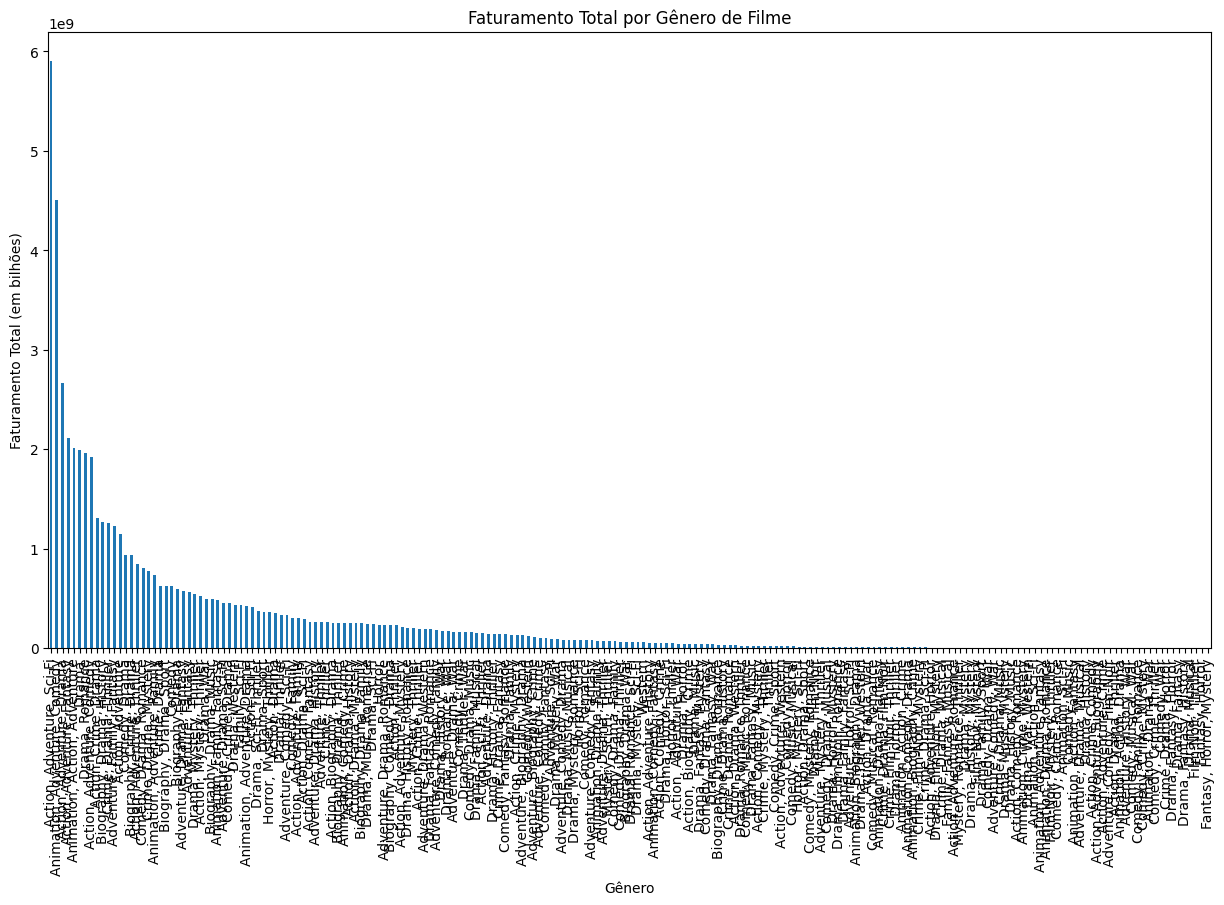

In [8]:
faturamento_por_genero = df.groupby('Genre')['Gross'].sum().sort_values(ascending=False)
plt.figure(figsize=(15, 8))
faturamento_por_genero.plot(kind='bar')
plt.title('Faturamento Total por Gênero de Filme')
plt.xlabel('Gênero')
plt.ylabel('Faturamento Total (em bilhões)')
plt.show()

Acima, eu comecei a parte de EDA para responder sobre os fatores de faturamento, já que Gross já foi convertido para formato numérico. Então, o que fiz foi: importar uma biblioteca para a visualização de dados e criar um gráfico de barras, onde pudesse ser visto o resultado por gênero.

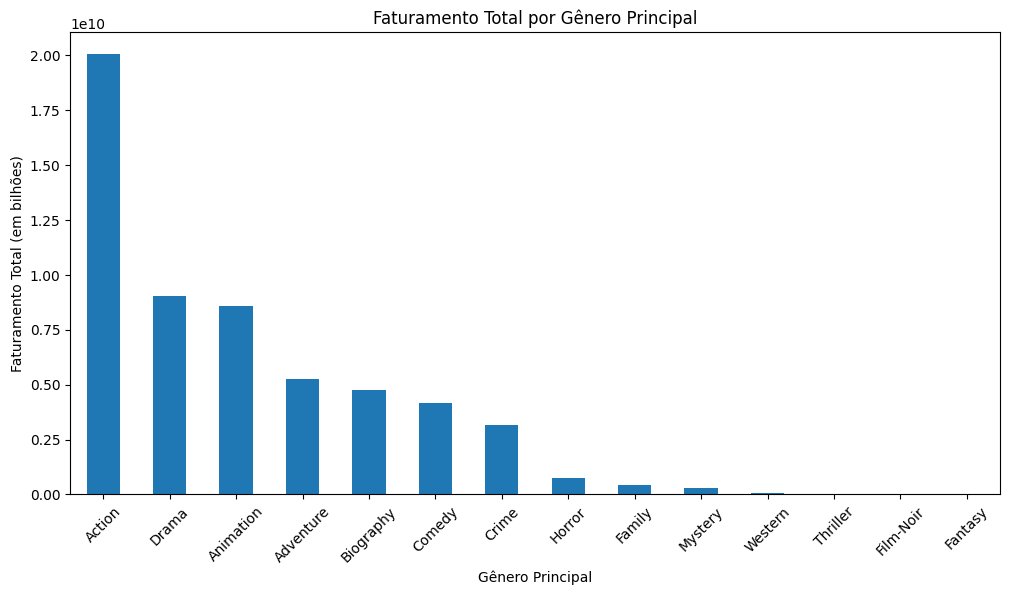

In [9]:
df['Primeiro_Genero'] = df['Genre'].apply(lambda x: x.split(',')[0])
faturamento_por_genero_principal = df.groupby('Primeiro_Genero')['Gross'].sum().sort_values(ascending=False)

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
faturamento_por_genero_principal.plot(kind='bar')
plt.title('Faturamento Total por Gênero Principal')
plt.xlabel('Gênero Principal')
plt.ylabel('Faturamento Total (em bilhões)')
plt.xticks(rotation=45)
plt.show()

Como o gráfico anterior tinha ficado muito cheio de informações e impossível de visualizar, decidi resolver criando um novo gráfico, a partir de uma nova coluna, que chamei de Primeiro_Genero e que busca apenas o primeiro gênero listado em Genre. Em seguida ajustei os dados e fiz a soma com o faturamento, e segui passos semelhantes pra criar um novo gráfico mais legível.

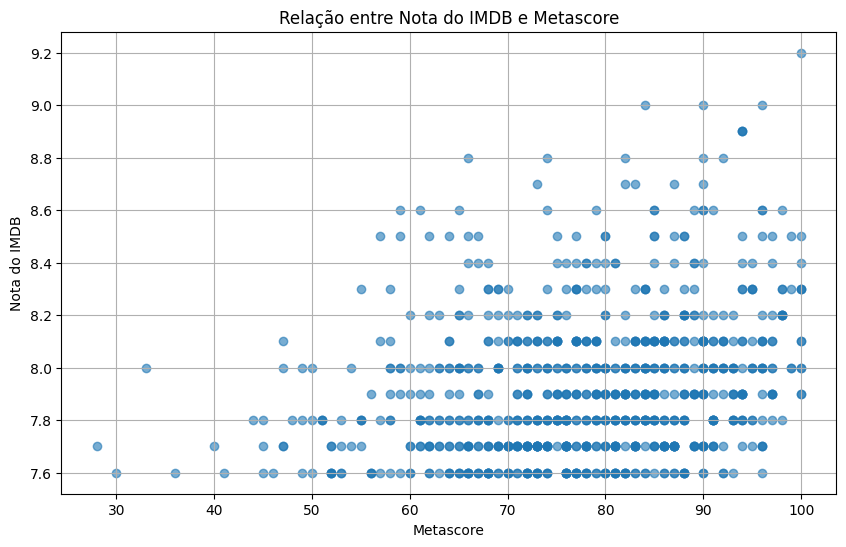

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(df['Meta_score'], df['IMDB_Rating'], alpha=0.6)
plt.title('Relação entre Nota do IMDB e Metascore')
plt.xlabel('Metascore')
plt.ylabel('Nota do IMDB')
plt.grid(True)
plt.show()

Dando continuidade à análise exploratória, criei um gráfico de dispersão pra conferir a relação entre a nota IMDB e o Meta_score de cada filme. Pra isso, importei a biblioteca matplotlib e gerei o gráfico.

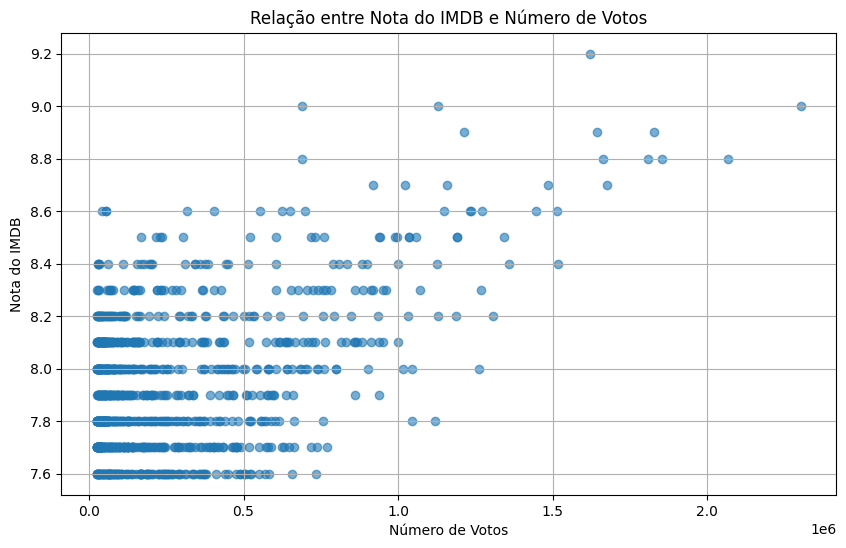

In [11]:
plt.figure(figsize=(10, 6))
plt.scatter(df['No_of_Votes'], df['IMDB_Rating'], alpha=0.6)
plt.title('Relação entre Nota do IMDB e Número de Votos')
plt.xlabel('Número de Votos')
plt.ylabel('Nota do IMDB')
plt.grid(True)
plt.show()

Logo acima: Decidi comparar também com o número de votos No_of_Votes, para conferir se havia relação entre essa coluna e o IMDB, gerando o gráfico. Em ambos os gráficos, foi notada uma relação positiva, que me diz que filmes com notas altas da crítica e popularidade tendem a ser mais bem avaliados.

In [12]:
!pip install wordcloud

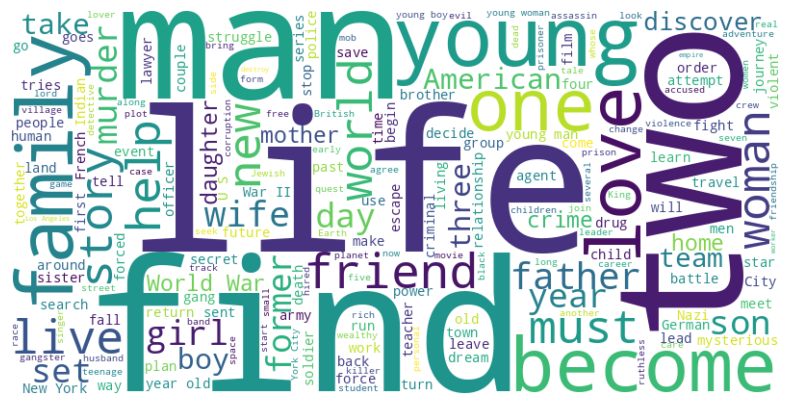

In [13]:
from wordcloud import WordCloud

import matplotlib.pyplot as plt

texto_completo = ' '.join(df['Overview'])
nuvem_de_palavras = WordCloud(width=800, height=400, background_color='white').generate(texto_completo)
plt.figure(figsize=(10, 5))
plt.imshow(nuvem_de_palavras, interpolation='bilinear')
plt.axis('off')
plt.show()

Logo acima, eu comecei a analisar a coluna Overview, usando PLN, que é uma técnica de machine learning muito simplificada, eu extraí dados a partir de uma nuvem de palavras. Primeiro, eu instalei a biblioteca wordcloud, em seguida importei as bibliotecas e juntei todo o texto de Overview em uma única string. Em seguida, criei e nuvem e a exibi em uma imagem, para colher os dados. Com isso, deu pra notar que os resumos dos filmes mais procurados têm palavras como: "find", "life", "two", etc.

In [14]:
import pandas as pd

generos_codificados = pd.get_dummies(df['Primeiro_Genero'], prefix='Genero')
df = pd.concat([df, generos_codificados], axis=1)
df = df.drop('Primeiro_Genero', axis=1)
print(df.head())

   Unnamed: 0                                   Series_Title Released_Year  \
0           1                                  The Godfather          1972   
1           2                                The Dark Knight          2008   
2           3                         The Godfather: Part II          1974   
3           4                                   12 Angry Men          1957   
4           5  The Lord of the Rings: The Return of the King          2003   

  Certificate  Runtime                     Genre  IMDB_Rating  \
0           A      175              Crime, Drama          9.2   
1          UA      152      Action, Crime, Drama          9.0   
2           A      202              Crime, Drama          9.0   
3           U       96              Crime, Drama          9.0   
4           U      201  Action, Adventure, Drama          8.9   

                                            Overview  Meta_score  \
0  An organized crime dynasty's aging patriarch t...       100.0   
1  W

Acima, seguindo o processo usando Machine Learning, eu importei a biblioteca Pandas para utilizar a variável dummy (one-hot encoding) e converter as colunas. Após usar a função get_dummies para converter, juntei as novas colunas à tabela original, e descartei a coluna que havia criado anteriormente, Primeiro_Genero, para não haver choque entre as informações. Tirei print pra ver se deu certo.

In [15]:
Y = df['IMDB_Rating']
X = df[['Meta_score', 'No_of_Votes'] + list(generos_codificados.columns)]
X['Meta_score'] = X['Meta_score'].fillna(X['Meta_score'].mean())
print("Variáveis Independentes (X):\n", X.head())
print("\nVariável Dependente (Y):\n", Y.head())

Variáveis Independentes (X):
    Meta_score  No_of_Votes  Genero_Action  Genero_Adventure  Genero_Animation  \
0       100.0      1620367          False             False             False   
1        84.0      2303232           True             False             False   
2        90.0      1129952          False             False             False   
3        96.0       689845          False             False             False   
4        94.0      1642758           True             False             False   

   Genero_Biography  Genero_Comedy  Genero_Crime  Genero_Drama  Genero_Family  \
0             False          False          True         False          False   
1             False          False         False         False          False   
2             False          False          True         False          False   
3             False          False          True         False          False   
4             False          False         False         False          False 

/tmp/ipython-input-1333781178.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Meta_score'] = X['Meta_score'].fillna(X['Meta_score'].mean())


Em seguida, acima, defini as variáveis: Y é a variável dependente, que vai ser usada pra prever o IMDB. X é a variável independente que usei pra fazer a previsão. Usei Meta_score, No_of_Votes e as colunas de gênero que  foram criadas. Preenchi os valores que estavam nulos em Meta_score, pra não dar erro. Tirei print pra ver se funcionou.

In [16]:
from sklearn.model_selection import train_test_split
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, test_size=0.2, random_state=42)
print(f"Tamanho do conjunto de treino (X_treino): {X_treino.shape}")
print(f"Tamanho do conjunto de teste (X_teste): {X_teste.shape}")

Tamanho do conjunto de treino (X_treino): (799, 16)
Tamanho do conjunto de teste (X_teste): (200, 16)


Acima, o que fiz foi dividir os dados, um pra treino e um pra teste, para poder conferir se o modelo realmente vai conseguir fazer previsões e treinar o machine learning.

In [17]:
from sklearn.linear_model import LinearRegression
modelo_regressao_linear = LinearRegression()
modelo_regressao_linear.fit(X_treino, Y_treino)

print("Modelo treinado com sucesso!")

Modelo treinado com sucesso!


Acima, escolhi o modelo de Regressão Linear para treino do machine learning, usei a biblioteca scikit-learn e importei o modelo, criei a instância e em seguida treinei o modelo usando os dados de treino (a parte de "estudo"). O modelo vai aprender , assim, a relação entre as variáveis X_treino e Y_treino. Tirei o print pra ver se deu certo.

In [18]:
from sklearn.metrics import mean_absolute_error
previsoes = modelo_regressao_linear.predict(X_teste)
mae = mean_absolute_error(Y_teste, previsoes)
print(f"O Erro Absoluto Médio (MAE) do modelo é: {mae:.2f}")

O Erro Absoluto Médio (MAE) do modelo é: 0.20


Logo acima, o que fiz, foi avaliar a precisão do modelo, usando o MAE, que é o Erro Absoluto Médio e serve pra dizer o quão longe a previsão está da nota real do filme.  Primeiro eu importei a métrica, em seguida fiz as previsões com o modelo usando os dados de teste e calculei o MAE comparando com as notas reais.  Tirei o print pra ver o resultado, que foi 0.20, não muito distante da nota real IMDB.

In [21]:
import pandas as pd

filme_shawshank = pd.DataFrame({
    'Meta_score': [80.0],
    'No_of_Votes': [2343110],
    'Genre': ['Drama']
})

all_genres = df['Genre'].apply(lambda x: x.split(',')[0]).unique()

for genre in all_genres:
    filme_shawshank[f'Genero_{genre}'] = False

filme_shawshank['Genero_Drama'] = True

genre_columns = [f'Genero_{genre}' for genre in all_genres]
dados_para_prever = filme_shawshank[['Meta_score', 'No_of_Votes'] + genre_columns]

colunas_para_prever = X_treino.columns
dados_para_prever = dados_para_prever.reindex(columns=colunas_para_prever, fill_value=0)

print("Colunas da tabela de treino:", list(X_treino.columns))
print("Colunas da tabela de previsão:", list(dados_para_prever.columns))

nota_prevista = modelo_regressao_linear.predict(dados_para_prever)
print(f"\nA nota do IMDB prevista para 'The Shawshank Redemption' é: {nota_prevista[0]:.2f}")


Colunas da tabela de treino: ['Meta_score', 'No_of_Votes', 'Genero_Action', 'Genero_Adventure', 'Genero_Animation', 'Genero_Biography', 'Genero_Comedy', 'Genero_Crime', 'Genero_Drama', 'Genero_Family', 'Genero_Fantasy', 'Genero_Film-Noir', 'Genero_Horror', 'Genero_Mystery', 'Genero_Thriller', 'Genero_Western']
Colunas da tabela de previsão: ['Meta_score', 'No_of_Votes', 'Genero_Action', 'Genero_Adventure', 'Genero_Animation', 'Genero_Biography', 'Genero_Comedy', 'Genero_Crime', 'Genero_Drama', 'Genero_Family', 'Genero_Fantasy', 'Genero_Film-Noir', 'Genero_Horror', 'Genero_Mystery', 'Genero_Thriller', 'Genero_Western']

A nota do IMDB prevista para 'The Shawshank Redemption' é: 8.88


Acima: criei o data frame do filme que foi colocado como modelo (Shawshank), peguei a lista de gêneros do df (dataset principal),  criei as colunas de gênero e o gênero para o filme modelo (Shawshank). Defini as colunas de entrada e alinhei com o X_treino, tirei o print pra conferir as colunas e por fim, fiz a previsão da nota IMDB pro filme.

In [22]:
import pickle
nome_arquivo = 'desafio_cd_notebook.pkl'
with open(nome_arquivo, 'wb') as arquivo:
    pickle.dump(modelo_regressao_linear, arquivo)

print(f"\nModelo salvo com sucesso no arquivo '{nome_arquivo}'")


Modelo salvo com sucesso no arquivo 'desafio_cd_notebook.pkl'


Por último, acima, salvei o modelo no formato que foi solicitado.


Considerações finais:

Análise Exploratória dos Dados (EDA): Fiz a limpeza das colunas Gross e Runtime, gerei gráficos para entender o faturamento por gênero e a relação entre as notas (IMDB_Rating, Meta_score e No_of_Votes).

Qual filme eu recomendaria: A resposta a essa pergunta foi uma conclusão da minha EDA. Recomendo um filme que tenha alta nota no IMDB e alta popularidade (alto número de votos), como foi visto nos gráficos de dispersão (The Godfather, que na verdade é um filme que particularmente gosto muito).

Fatores de faturamento: Identifiquei os principais fatores de faturamento na minha EDA, que foram o gênero do filme e a popularidade.

Insights com Overview e inferência de gênero: Usei uma nuvem de palavras para extrair os insights e confirmei que é possível inferir o gênero do filme a partir do texto, classificando como um problema de processamento de linguagem natural (PLN).

Previsão da nota do IMDB:

Como fiz a previsão: Usei um modelo de Machine Learning.

Variáveis: Usei Meta_score, No_of_Votes e o Primeiro_Genero (convertido com One-Hot Encoding).

Tipo de problema: foi identificado como um problema de regressão.

Modelo: escolhi o modelo de Regressão Linear.

Medida de performance: Selecionei o MAE como métrica para avaliar o modelo.

Qual seria a nota do IMDB: Usei o modelo treinado para prever a nota do filme de exemplo, que foi "The Shawshank Redemption", obtendo um resultado praticamente preciso.

Organizei meu código em um notebook, fiz um README.md, criei o requirements.txt e salvei o modelo em .pkl, acredito que cumprindo, assim, todas as exigências do desafio.